In [87]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
merged_data = pd.merge(clinical_trial_data, mouse_drug_data, how='left')

merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [88]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_volume_data = merged_data.groupby(['Drug', 'Timepoint']).mean()['Tumor Volume (mm3)']

# Convert to DataFrame
tumor_volume_df = pd.DataFrame(mean_tumor_volume_data).reset_index()

# Preview DataFrame
tumor_volume_df.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [89]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
SE_tumor_volume_data = merged_data.groupby(['Drug', 'Timepoint']).sem()['Tumor Volume (mm3)']

# Convert to DataFrame
SE_tumor_volume_data = pd.DataFrame(SE_tumor_volume_data).reset_index()

# Preview DataFrame
SE_tumor_volume_data.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [90]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_tumor_volume = tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
reformatted_tumor_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


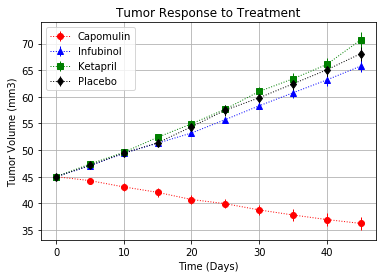

In [91]:
# Generate the Plot (with Error Bars)
def plotvariables(Drug):  
    x = tumor_volume_df.loc[tumor_volume_df["Drug"] == Drug, "Timepoint"]
    y = tumor_volume_df.loc[tumor_volume_df["Drug"] == Drug, "Tumor Volume (mm3)"]
    z = SE_tumor_volume_data.loc[SE_tumor_volume_data["Drug"] == Drug, "Tumor Volume (mm3)"]
    
    return x, y, z

capo_x, capo_y, capo_sem = plotvariables("Capomulin")
infu_x, infu_y, infu_sem = plotvariables("Infubinol")
keta_x, keta_y, keta_sem = plotvariables("Ketapril")
plac_x, plac_y, plac_sem = plotvariables("Placebo")

fig, ax = plt.subplots()

ax.errorbar(capo_x, capo_y, yerr = capo_sem, fmt="o",color="red", linewidth=1, linestyle=':', label="Capomulin")
ax.errorbar(infu_x, infu_y, yerr = infu_sem, fmt="^",color="blue", linewidth=1, linestyle=':', label="Infubinol")
ax.errorbar(keta_x, keta_y, yerr = keta_sem, fmt="s",color="green", linewidth=1, linestyle=':', label="Ketapril")
ax.errorbar(plac_x, plac_y, yerr = plac_sem, fmt="d",color="black", linewidth=1, linestyle=':', label="Placebo")

ax.set_title("Tumor Response to Treatment")
ax.set_xlabel("Time (Days)")
ax.set_ylabel("Tumor Volume (mm3)")

plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("Images/TumorResponseToTreatment.png")

# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [92]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
mean_met_site_data = merged_data.groupby(['Drug', 'Timepoint']).mean()['Metastatic Sites']

# Convert to DataFrame
mean_met_site_data = pd.DataFrame(mean_met_site_data).reset_index()

# Preview DataFrame
mean_met_site_data.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [93]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint
SE_met_site_data = merged_data.groupby(['Drug', 'Timepoint']).sem()['Metastatic Sites']

# Convert to DataFrame
SE_met_site_data = pd.DataFrame(SE_met_site_data).reset_index()

# Preview DataFrame
SE_met_site_data.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [94]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_tumor_volume = tumor_volume_df.pivot(index='Timepoint', columns='Drug', values='Tumor Volume (mm3)')

# Preview that Reformatting worked
reformatted_tumor_volume.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


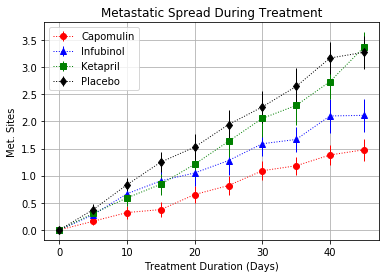

In [95]:
# Generate the Plot (with Error Bars)
def plotvariables2(Drug):  
    a = mean_met_site_data.loc[mean_met_site_data["Drug"] == Drug, "Timepoint"]
    b = mean_met_site_data.loc[mean_met_site_data["Drug"] == Drug, "Metastatic Sites"]
    c = SE_met_site_data.loc[SE_met_site_data["Drug"] == Drug, "Metastatic Sites"]
    
    return a, b, c

capo_x2, capo_y2, capo_sem2 = plotvariables2("Capomulin")
infu_x2, infu_y2, infu_sem2 = plotvariables2("Infubinol")
keta_x2, keta_y2, keta_sem2 = plotvariables2("Ketapril")
plac_x2, plac_y2, plac_sem2 = plotvariables2("Placebo")

fig, ax = plt.subplots()

ax.errorbar(capo_x2, capo_y2, yerr = capo_sem2, fmt="o",color="red", linewidth=1, linestyle=':', label="Capomulin")
ax.errorbar(infu_x2, infu_y2, yerr = infu_sem2, fmt="^",color="blue", linewidth=1, linestyle=':', label="Infubinol")
ax.errorbar(keta_x2, keta_y2, yerr = keta_sem2, fmt="s",color="green", linewidth=1, linestyle=':', label="Ketapril")
ax.errorbar(plac_x2, plac_y2, yerr = plac_sem2, fmt="d",color="black", linewidth=1, linestyle=':', label="Placebo")

ax.set_title("Metastatic Spread During Treatment")
ax.set_xlabel("Treatment Duration (Days)")
ax.set_ylabel("Met. Sites")

plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("Images/MetastaticSpreadDuringTreatment.png")

# Show the Figure
plt.show()

## Survival Rates

In [96]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
survival_rates = merged_data.groupby(['Drug', 'Timepoint']).count()['Mouse ID']

# Convert to DataFrame
survival_rates = pd.DataFrame(survival_rates).reset_index()
survival_rates = survival_rates.rename(index=str, columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
survival_rates.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [97]:
# Minor Data Munging to Re-Format the Data Frames
reformatted_survival_rates = survival_rates.pivot(index='Timepoint', columns='Drug', values='Mouse Count')

# Preview the Data Frame
reformatted_survival_rates.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


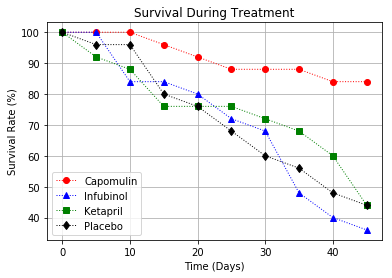

In [98]:
# Generate the Plot (Accounting for percentages)
def plotvariables3(Drug):  
    d = survival_rates.loc[survival_rates["Drug"] == Drug, "Timepoint"]
    p = survival_rates.loc[survival_rates["Drug"] == Drug, "Mouse Count"]
    e = pd.DataFrame(p)
    e = e["Mouse Count"]
    e = e[0]
    e = (p/e)*100
    
    return d, e

capo_x3, capo_y3 = plotvariables3("Capomulin")
infu_x3, infu_y3 = plotvariables3("Infubinol")
keta_x3, keta_y3 = plotvariables3("Ketapril")
plac_x3, plac_y3 = plotvariables3("Placebo")

capoplot, = plt.plot(capo_x3, capo_y3, marker="o",color="red", linewidth=1, linestyle=':', label="Capomulin")
infuplot, = plt.plot(infu_x3, infu_y3, marker="^",color="blue", linewidth=1, linestyle=':', label="Infubinol")
ketaplot, = plt.plot(keta_x3, keta_y3, marker="s",color="green", linewidth=1, linestyle=':', label="Ketapril")
placplot, = plt.plot(plac_x3, plac_y3, marker="d",color="black", linewidth=1, linestyle=':', label="Placebo")

plt.title("Survival During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate (%)")

plt.grid()
plt.legend(loc="best")

# Save the Figure
plt.savefig("Images/SurvivalDuringTreatment.png")

# Show the Figure
plt.show()

## Summary Bar Graph

In [99]:
# Calculate the percent changes for each drug
Drugs = ["Capomulin", "Ceftamin", "Infubinol", "Ketapril", "Naftisol", "Placebo", "Propriva", "Ramicane", 
        "Stelasyn", "Zoniferol"]

percchanges = []

def percentchange(Drug):  
    table_data = tumor_volume_df.loc[tumor_volume_df["Drug"] == Drug, "Tumor Volume (mm3)"]
    table_data_df = pd.DataFrame(table_data)
    table_data_df = table_data_df["Tumor Volume (mm3)"].reset_index(drop=True)
    final_data = table_data_df[9]
    initial_data = table_data_df[0]
    percchange = round(((final_data - initial_data)/(initial_data))*100, 6)
    
    return percchange

for Drug in Drugs:
    percchanges.append(percentchange(Drug))
    
# Display the data to confirm
perc_changes_summary = pd.DataFrame({"Drug": Drugs, "% Change": percchanges})

perc_changes_summary

,Drug,% Change
0,Capomulin,-19.475303
1,Ceftamin,42.516492
2,Infubinol,46.123472
3,Ketapril,57.028795
4,Naftisol,53.923347
5,Placebo,51.297960
6,Propriva,47.241175
7,Ramicane,-22.320900
8,Stelasyn,52.085134
9,Zoniferol,46.579751


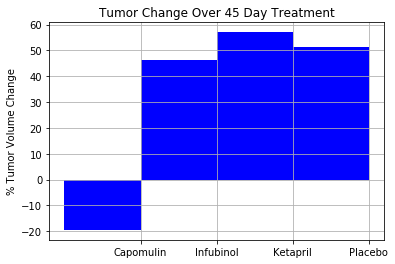

In [100]:
# Store all Relevant Percent Changes into a Tuple
relevant_perc_changes = (percchanges[0], percchanges[2], percchanges[3], percchanges[5])

# Also store into a list
relevant_perc_changes_list = [percchanges[0], percchanges[2], percchanges[3], percchanges[5]]

# Splice the data between passing and failing drugs
relevant_drugs = [Drugs[0], Drugs[2], Drugs[3], Drugs[5]]
perc_tumor_vol_change = relevant_perc_changes_list
x_axis = np.arange(len(perc_tumor_vol_change))

# Orient widths. Add labels, tick marks, etc. 
plt.grid()
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, relevant_drugs)
plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("% Tumor Volume Change")

# Use functions to label the percentages of changes
#for i, v in enumerate(perc_tumor_vol_change):
    #ax.text(v + 200, i + 200, str(v), color='white', fontweight='bold')

# Call functions to implement the function calls

# Show the Figure
#check1 = perc_tumor_vol_change < 0
#check2 = perc_tumor_vol_change >= 0

#plt.bar(x_axis[check1], perc_tumor_vol_change[check1], color = "r", align="edge", width=-1)
#plt.bar(x_axis[check2], perc_tumor_vol_change[check2], color = "b", align="edge", width=-1)

plt.bar(x_axis, perc_tumor_vol_change, color="b", align="edge", width=-1)

fig.show()

# Save the Figure
plt.savefig("Images/TumorChangeOver45DayTreatment.png")